# Matrix Factorization using Bregman Divergenses

## Testing NMF class

In [1]:
from sklearn.decomposition import NMF as nmfsk
from MatrixFactorization import NMF as nmfmy
import numpy as np
from numpy.random import RandomState
from sklearn.metrics import mean_squared_error
from math import sqrt

## 1. Testing General Rules vs Normal Ones (Poisson)

### 1.1 Selecting best way to represent Poisson Distribution with Non- negative Values

Poission Distribution from definition does not take negative values since it is a discrete probability distribution. 

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import scipy
poisson = scipy.stats.distributions.poisson
rs = RandomState(76321654)
l = 5
V = rs.poisson(lam = l, size = 10000).reshape(200,50)
sns.set(color_codes=True)
sns.distplot(V[4])


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


### 1.2 Test NMF for Data coming from Poisson Distribution

In [3]:
n = 14


#### LOG Likelihood 

In [4]:
import math
def neg_log_poisson(V,W,H):
    logs_likelihoods = poisson.logpmf(V, np.rint(W.dot(H)))
    neg_logs = - logs_likelihoods
    inf_indices = np.where(neg_logs==float('inf'))
    other = np.where(neg_logs != float('inf'))
    neg_logs[inf_indices] = np.max(neg_logs[other])
    return np.nansum(neg_logs)

### My Implementation With Simple Update Rules

In [5]:
rs = RandomState(76321654)
nmfM = nmfmy( n_components=n,random_state=rs, distribution = 'poisson')
W1, H1 = nmfM.fit_transform(V)
diffM = neg_log_poisson(V, W1, H1)
print('Neg Log Likelihood Between My Results and V :' + str(diffM))

Neg Log Likelihood Between My Results and V :19996.10083022685


### My Implementation With General Update Rules

In [6]:
rs = RandomState(76321654)
nmfM = nmfmy( n_components=n,random_state=rs, distribution = 'poisson',phi_update = True)
W, H = nmfM.fit_transform(V)
diffM = neg_log_poisson(V, W, H)
print('Neg Log Likelihood Between My Results and V :' + str(diffM))

Neg Log Likelihood Between My Results and V :19996.10083022685


### Compare the three Approaches

In [7]:
errorsSimple = np.zeros(50)
errorsGeneral = np.zeros(50)

lsSimple = np.zeros(50)
lsGeneral = np.zeros(50)



for n in range(1, 51):
    rs = RandomState(76321654)
    
   
   
    #My Simple
    rs = RandomState(76321654)
    nmfSimple = nmfmy(n_components=n,random_state=rs,  distribution = 'poisson')
    WSimple, HSimple = nmfSimple.fit_transform(V)
    
    # My with General
    rs = RandomState(76321654)
    nmfGeneral = nmfmy(n_components=n,random_state=rs,  distribution = 'poisson',phi_update = True)
    WGeneral, HGeneral = nmfGeneral.fit_transform(V)
   
  
    
    # Mean Squared Errors
    diffS = mean_squared_error(V, WSimple.dot(HSimple))
    errorsSimple[n-1] = diffS
    
    diffS2 = mean_squared_error(V, WGeneral.dot(HGeneral))
    errorsGeneral[n-1] = diffS2
    
    
    # Average Negative log likelihood
    diffS = neg_log_poisson(V, WSimple, HSimple)
    lsSimple[n-1] = diffS / (V.shape[0] * V.shape[1])
    
    diffS2 = neg_log_poisson(V, WGeneral, HGeneral)
    lsGeneral[n-1] = diffS2 / (V.shape[0] * V.shape[1])
    
    

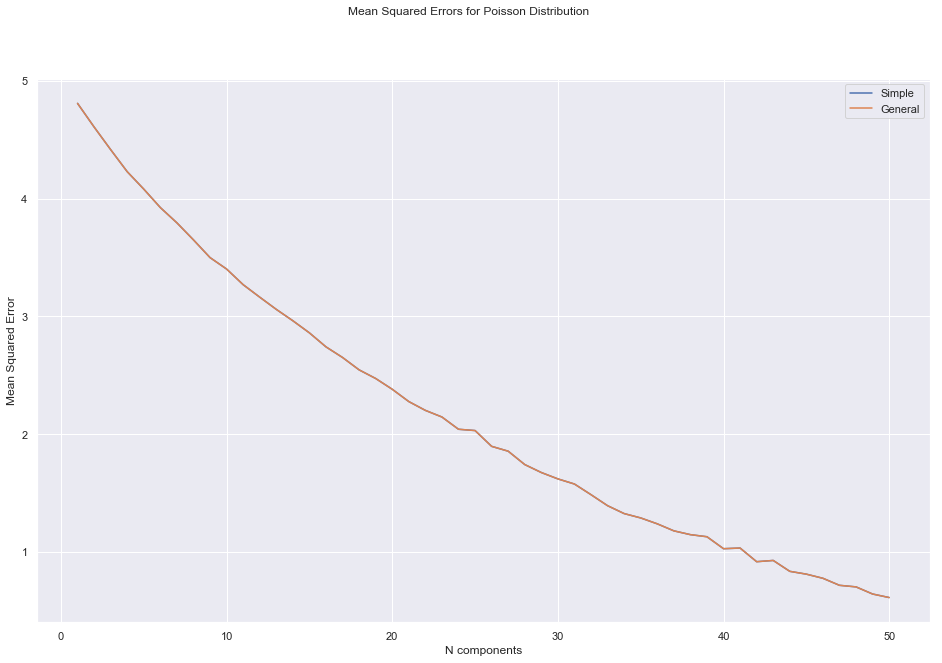

In [8]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    
ax_1.plot(np.arange(1, 51), 
                  errorsSimple, label="Simple")
ax_1.plot(np.arange(1, 51), 
                  errorsGeneral, label="General")

ax_1.legend(loc=0)

ax_1.set_xlabel('N components')
ax_1.set_ylabel('Mean Squared Error')
fig_1.suptitle('Mean Squared Errors for Poisson Distribution')
fig_1.savefig('MeanSquaredErrorsForNMFPoissonCompareSimpleGeneral.pdf')

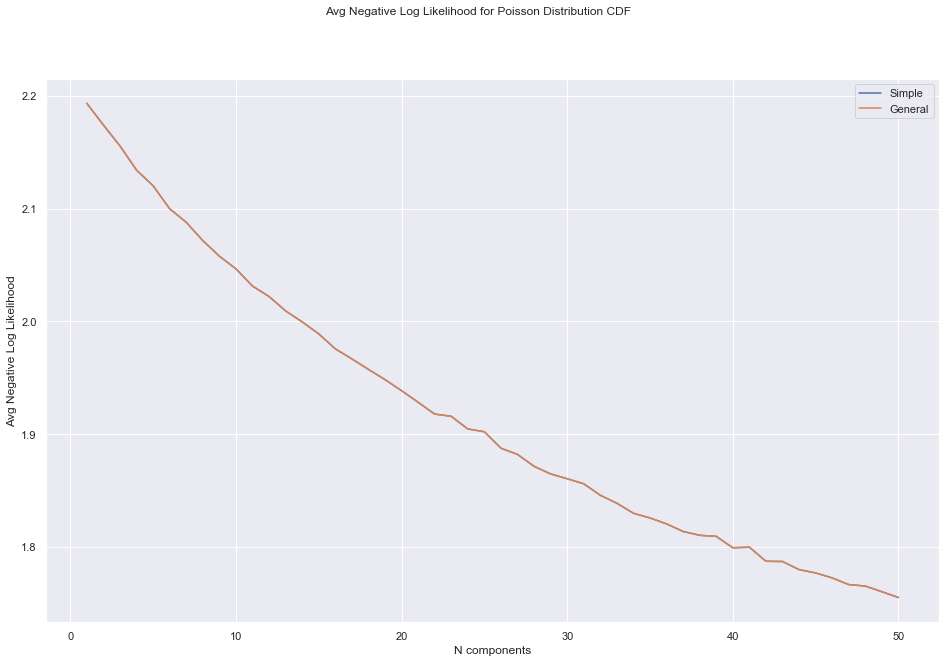

In [9]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    
ax_1.plot(np.arange(1, 51), 
                  lsSimple, label="Simple")
ax_1.plot(np.arange(1, 51), 
                  lsGeneral, label="General")

ax_1.legend(loc=0)

ax_1.set_xlabel('N components')
ax_1.set_ylabel('Avg Negative Log Likelihood')
fig_1.suptitle('Avg Negative Log Likelihood for Poisson Distribution CDF')
fig_1.savefig('AverageNegLogLikelihoodForNMFPoissonCompareSimpleGeneral.pdf')

In [10]:
n = 10

#### Distribution compared to Mine with 10 components and Simple

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Original Data mean: 5.0147 std: 2.219478296807608
Tansformation Data : 5.0147 std: 1.218189890431601


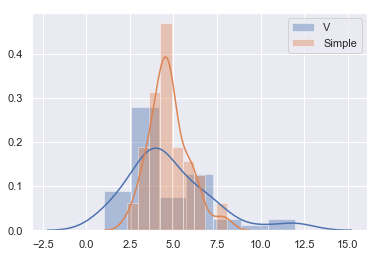

In [11]:
rs = RandomState(76321654)
nmfM = nmfmy(n_components=n,random_state=rs, distribution = 'poisson')
W, H = nmfM.fit_transform(V)
bins = (V.max() - V.min())
sns.set(color_codes=True)
sns.distplot(V[10],  label = 'V')
sns.distplot(W.dot(H)[10],  label = 'Simple')
plt.legend()
print('Original Data mean: ' + str(V.mean()) + ' std: ' + str(V.std()) )
print('Tansformation Data : ' + str(W.dot(H).mean()) + ' std: ' + str(W.dot(H).std()) )

#### Distribution compared to Mine with 10 components with Phi

Original Data mean: 5.0147 std: 2.219478296807608
Tansformation Data : 5.0147 std: 1.2181898904316013


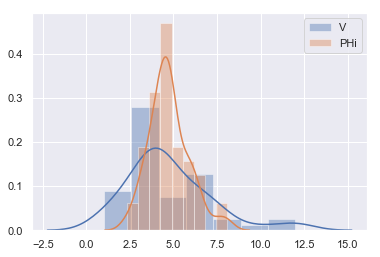

In [12]:
rs = RandomState(76321654)
nmfM = nmfmy(n_components=n,random_state=rs, distribution = 'poisson', phi_update = True)
W, H = nmfM.fit_transform(V)
bins = (V.max() - V.min())
sns.set(color_codes=True)
sns.distplot(V[10],  label = 'V')
sns.distplot(W.dot(H)[10],  label = 'PHi')
plt.legend()
print('Original Data mean: ' + str(V.mean()) + ' std: ' + str(V.std()) )
print('Tansformation Data : ' + str(W.dot(H).mean()) + ' std: ' + str(W.dot(H).std()) )

In [13]:



n = 10
i = 0
max_ts = [200,1000,2000,4000,8000,16000,32000,40000]
errorsSimple = np.zeros(len(max_ts))
errorsGeneral = np.zeros(len(max_ts))

lsSimple = np.zeros(len(max_ts))
lsGeneral = np.zeros(len(max_ts))

for max_it in max_ts:
    rs = RandomState(76321654)
    
   
   
    #My Simple
    rs = RandomState(76321654)
    nmfSimple = nmfmy(max_iterations = max_it, n_components=n,random_state=rs,  distribution = 'poisson')
    WSimple, HSimple = nmfSimple.fit_transform(V)
    
    # My with General
    rs = RandomState(76321654)
    nmfGeneral = nmfmy(max_iterations = max_it, n_components=n,random_state=rs,  distribution = 'poisson',phi_update = True)
    WGeneral, HGeneral = nmfGeneral.fit_transform(V)
   
  
    
    # Mean Squared Errors
    diffS = mean_squared_error(V, WSimple.dot(HSimple))
    errorsSimple[i] = diffS
    
    diffS2 = mean_squared_error(V, WGeneral.dot(HGeneral))
    errorsGeneral[i] = diffS2
    
    
    # Average Negative log likelihood
    diffS = neg_log_poisson(V, WSimple, HSimple)
    lsSimple[i] = diffS / (V.shape[0] * V.shape[1])
    
    diffS2 = neg_log_poisson(V, WGeneral, HGeneral)
    lsGeneral[i] = diffS2 / (V.shape[0] * V.shape[1])
    
    print('MAX ITERATIONS :' + str(max_it))
    print("Mean Squared Error For Simple : " +  str(errorsSimple[i]))
    print("Mean Squared Error For Genearal : " +  str(errorsGeneral[i]))
    print("Average Negative Log Likelihood for Simple : " +  str(lsSimple[i]))
    print("Average Negative Log Likelihood for General : " +  str(lsGeneral[i]))
    i += 1
    
    

MAX ITERATIONS :200
Mean Squared Error For Simple : 3.401365540058037
Mean Squared Error For Genearal : 3.401365540058037
Average Negative Log Likelihood for Simple : 2.0467056782593738
Average Negative Log Likelihood for General : 2.0467056782593738
MAX ITERATIONS :1000
Mean Squared Error For Simple : 3.3365569845515495
Mean Squared Error For Genearal : 3.3365569845515495
Average Negative Log Likelihood for Simple : 2.0375619322943557
Average Negative Log Likelihood for General : 2.0375619322943557
MAX ITERATIONS :2000
Mean Squared Error For Simple : 3.3235986373403548
Mean Squared Error For Genearal : 3.3235986373403548
Average Negative Log Likelihood for Simple : 2.036077067453054
Average Negative Log Likelihood for General : 2.036077067453054
MAX ITERATIONS :4000
Mean Squared Error For Simple : 3.3202758568384696
Mean Squared Error For Genearal : 3.32027585683847
Average Negative Log Likelihood for Simple : 2.035032977741886
Average Negative Log Likelihood for General : 2.035032977

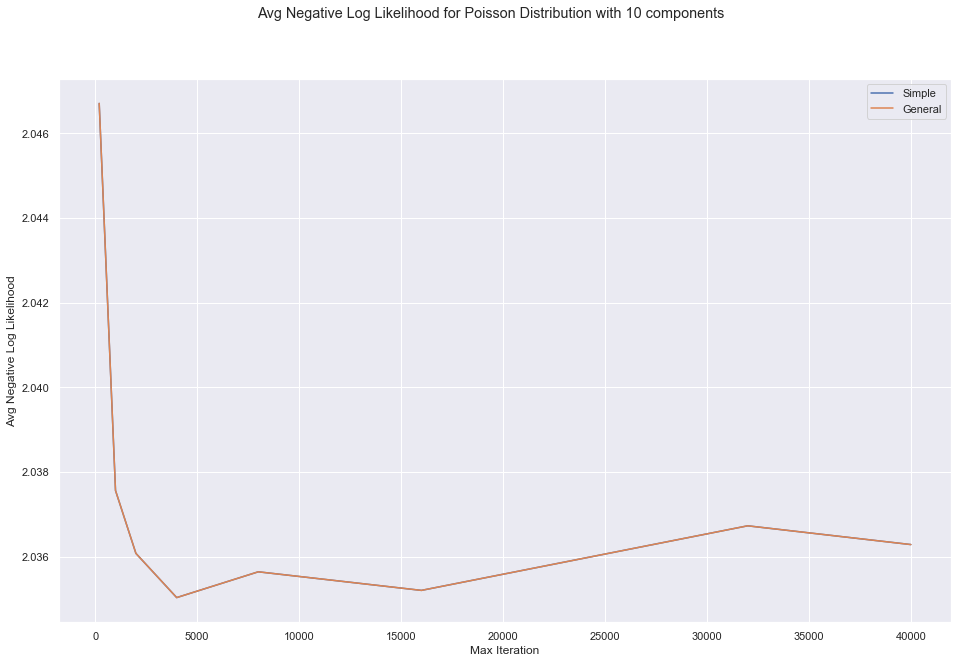

In [14]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    
ax_1.plot(max_ts, 
                  lsSimple, label="Simple")
ax_1.plot(max_ts, 
                  lsGeneral, label="General")

ax_1.legend(loc=0)

ax_1.set_xlabel('Max Iteration')
ax_1.set_ylabel('Avg Negative Log Likelihood')
fig_1.suptitle('Avg Negative Log Likelihood for Poisson Distribution with 10 components')
fig_1.savefig('AverageNegLogLikelihoodForNMFPoissonCompareSimpleGeneralMaxIts.pdf')